In [120]:
## Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [121]:
## Loading the project data
data = pd.read_csv(r'archive/M1_final.csv')

In [122]:
## Exploring the data
data.head(10)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,323,448,48,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,333,531,48,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,341,482,48,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,343,513,48,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,356,499,46,32,58,W,24,35,29.91,Fair / Windy,9,17,13
5,11,1,5,AA,N983NN,ORD,-1,161,740,359,358,460,46,32,58,W,24,35,29.91,Fair / Windy,9,17,21
6,11,1,5,AA,N107NN,LAX,-1,373,2475,360,359,553,46,32,58,W,24,35,29.91,Fair / Windy,9,17,26
7,11,1,5,B6,N274JB,BUF,-5,80,301,365,360,445,46,32,58,W,24,35,29.91,Fair / Windy,17,21,11
8,11,1,5,B6,N663JB,LGB,0,368,2465,365,365,553,46,32,58,W,24,35,29.91,Fair / Windy,17,21,25
9,11,1,5,B6,N283JB,FLL,3,184,1069,370,373,554,46,32,58,W,24,35,29.91,Fair / Windy,17,21,29


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [ ]:
##data[data['DEP_DELAY'] > 0].value_counts()
data[data['DEP_DELAY'] < 0].value_counts()
##data.shape
##data[data['DEP_DELAY'] == 0].value_counts()

In [117]:
## Is there a correlation between wind speed and departure delays?

Object `delays` not found.


In [124]:

##X = pd.DataFrame(data[['Temperature', 'Humidity','Wind Speed','Pressure']]).copy()
##y = pd.DataFrame(data['TAXI_OUT'])

X = data['Wind Speed'].values.reshape(-1, 1)
y = data['DEP_DELAY'].values.reshape(-1, 1)

In [125]:
# Splitting our data 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=21)

In [126]:
## Printing the shape of our train and test datasets
print('X_train size is: ', X_train.shape)
print('X_test size is: ', X_test.shape)
print('y_train size is: ', y_train.shape)
print('y_test size is: ', X_test.shape)

X_train size is:  (21615, 1)
X_test size is:  (7205, 1)
y_train size is:  (21615, 1)
y_test size is:  (7205, 1)


In [127]:
## Creating an instance of a Linear Regression model
lr_model = LinearRegression()

In [128]:
## Training the model with the data at hand
lr_model.fit(X_train, y_train)

LinearRegression()

In [129]:
y_pred = lr_model.predict(X_test)

In [130]:
df1 = pd.DataFrame({'Actual': y_test.reshape(-1), 'Predicted' : y_pred.reshape(-1)})

In [131]:
## Printing the regression intercept value
print(lr_model.intercept_)

[1.10577371]


In [132]:
## Printing the regression coefficient value
print(lr_model.coef_)

[[0.43030355]]


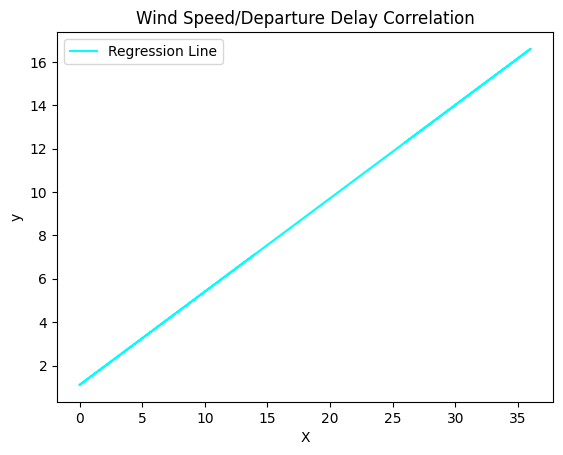

In [133]:
## Visualising the relationship between the two features
plt.plot(X_test, y_pred, color='cyan', label='Regression Line')
plt.title('Wind Speed/Departure Delay Correlation')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()